In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
scaler = StandardScaler()

co_dataset = pd.read_csv('./datasets/CO-2015-2019.csv')
co_headers = co_dataset.iloc[0]
co_dataset  = pd.DataFrame(co_dataset.values[1:], columns = co_headers)

fdp_dataset = pd.read_csv('./datasets/FDP-2015-2019.csv')
fdp_headers = fdp_dataset.iloc[0]
fdp_dataset  = pd.DataFrame(fdp_dataset.values[1:], columns = fdp_headers)

no2_dataset = pd.read_csv('./datasets/NO2-2015-2019.csv')
no2_headers = no2_dataset.iloc[0]
no2_dataset  = pd.DataFrame(no2_dataset.values[1:], columns = no2_headers)

In [3]:
co_dataset.head()

,Date,Hour,Sofia-EEA Pavlovo,Sofia - Kopitoto,Sofia - Mladost,Sofia - Orlov Most,Sofia -Hipodrome
0,1/1/2015,1:00,1.09,0.21,NaN,1.34,0.87
1,1/1/2015,2:00,1.7,0.23,NaN,1.84,1.43
2,1/1/2015,3:00,1.71,0.2,NaN,1.74,1.84
3,1/1/2015,4:00,1.96,0.21,NaN,2.16,1.75
4,1/1/2015,5:00,1.28,0.24,NaN,1.16,1.72


In [4]:
fdp_dataset.head()

,Date,Time,Sofia-Druzhba,Sofia - EEA/Pavlovo,Sofia-Kopitoto,Sofia - Mladost,Sofia-Nadezhda,Sofia - Orlov Most,Sofia - Hipodrome,Gara Yana
0,1/1/2015,1:00,78.55,110.01,13.3,NaN,95.53,49.33,31.79,77.30
1,1/1/2015,2:00,159.85,206.11,14.42,NaN,64.11,100.33,94.59,91.20
2,1/1/2015,3:00,100.8,205.72,13.44,NaN,21.53,63.58,98.81,47.60
3,1/1/2015,4:00,53.33,179.01,12.45,NaN,11.17,70.5,89.95,29.40
4,1/1/2015,5:00,32.93,86.91,12.66,NaN,14.32,21.47,70.26,31.30


In [5]:
no2_dataset.head()

,Date,Hour,Sofia - Druzhba,Sofia - EEA Pavlovo,Sofia - Kopitoto,Sofia - Mladost,Sofia - Nadezhda,Sofia-Orlov Most,Sofia - Hipodrome
0,1/1/2015,1:00,30.66,39.73,1.45,NaN,18.75,34.82,18.83
1,1/1/2015,2:00,27.2,53.75,1.75,NaN,15.12,45.55,34.33
2,1/1/2015,3:00,27.49,49.35,1.55,NaN,11.15,45.54,54.43
3,1/1/2015,4:00,29.55,56.91,1.62,NaN,11.5,47.88,52.89
4,1/1/2015,5:00,13.05,48.33,1.48,NaN,20.87,29.3,47.85


In [6]:
# И двата дейта сета имат еднакъв брой редове и колони
co_dataset.shape

(43824, 7)

In [7]:
fdp_dataset.shape

(43824, 10)

In [8]:
no2_dataset.shape

(43824, 9)

In [9]:
co_dataset.describe()

,Date,Hour,Sofia-EEA Pavlovo,Sofia - Kopitoto,Sofia - Mladost,Sofia - Orlov Most,Sofia -Hipodrome
count,43824,43824,42444,39922,35947,6569,42989
unique,1826,24,521,172,416,391,541
top,1/1/2015,1:00,0.31,0.23,0.36,0.34,0.35
freq,24,1826,984,975,759,119,792


In [10]:
fdp_dataset.describe()

,Date,Time,Sofia-Druzhba,Sofia - EEA/Pavlovo,Sofia-Kopitoto,Sofia - Mladost,Sofia-Nadezhda,Sofia - Orlov Most,Sofia - Hipodrome,Gara Yana
count,43824,43824,42550,42098,39898,35618,40855,6326,43098,1720
unique,1826,24,9059,10282,4932,8156,10638,4042,9879,628
top,1/1/2015,1:00,16.53,25.87,3.63,21.56,2.64,25.29,19.78,21.90
freq,24,1826,27,24,93,23,570,7,24,12


In [11]:
no2_dataset.describe()

,Date,Hour,Sofia - Druzhba,Sofia - EEA Pavlovo,Sofia - Kopitoto,Sofia - Mladost,Sofia - Nadezhda,Sofia-Orlov Most,Sofia - Hipodrome
count,43824,43824,43561,41216,39510,33272,41624,6447,43533
unique,1826,24,7600,9275,2775,8400,7842,4554,8842
top,1/1/2015,1:00,10.75,-1.67,1.49,10.85,0,22.39,16.84
freq,24,1826,29,63,254,20,244,6,28


In [12]:
co_dataset = co_dataset.rename(columns={"Date": "Date-Time", "Sofia-EEA Pavlovo":"Pavlovo-CO", "Sofia - Kopitoto":"Kopitoto-CO", "Sofia - Mladost":"Mladost-CO", "Sofia - Orlov Most":"OrlovMost", "Sofia -Hipodrome":"Hipodrome-CO"})

In [13]:
fdp_dataset = fdp_dataset.rename(columns={"Date": "Date-Time", "Time": "Hour", "Sofia-Druzhba":"Druzhba-FDP", "Sofia - EEA/Pavlovo":"Pavlovo-FDP", "Sofia-Kopitoto":"Kopitoto-FDP", "Sofia - Mladost":"Mladost-FDP", "Sofia-Nadezhda":"Nadezhda-FDP", "Sofia - Orlov Most":"OrlovMost", "Sofia - Hipodrome":"Hipodrome-FDP", "Gara Yana":"GaraYana"})

In [14]:
no2_dataset = no2_dataset.rename(columns={"Date": "Date-Time", "Sofia - EEA Pavlovo":"Pavlovo-NO2", "Sofia - Kopitoto":"Kopitoto-NO2", "Sofia - Mladost":"Mladost-NO2", "Sofia-Orlov Most":"OrlovMost", "Sofia - Hipodrome":"Hipodrome-NO2", "Sofia - Druzhba":"Druzhba-NO2", "Sofia - Nadezhda":"Nadezhda-NO2"})

In [15]:
sum(co_dataset.duplicated())

0

In [16]:
sum(fdp_dataset.duplicated())

0

In [17]:
sum(no2_dataset.duplicated())

0

In [18]:
co_dataset.isnull().sum()

0
Date-Time           0
Hour                0
Pavlovo-CO       1380
Kopitoto-CO      3902
Mladost-CO       7877
OrlovMost       37255
Hipodrome-CO      835
dtype: int64

In [19]:
fdp_dataset.isnull().sum()

0
Date-Time            0
Hour                 0
Druzhba-FDP       1274
Pavlovo-FDP       1726
Kopitoto-FDP      3926
Mladost-FDP       8206
Nadezhda-FDP      2969
OrlovMost        37498
Hipodrome-FDP      726
GaraYana         42104
dtype: int64

In [20]:
no2_dataset.isnull().sum()

0
Date-Time            0
Hour                 0
Druzhba-NO2        263
Pavlovo-NO2       2608
Kopitoto-NO2      4314
Mladost-NO2      10552
Nadezhda-NO2      2200
OrlovMost        37377
Hipodrome-NO2      291
dtype: int64

In [21]:
# Convert string values to float
co_dataset["Pavlovo-CO"] = pd.to_numeric(co_dataset["Pavlovo-CO"], downcast="float")
co_dataset["Kopitoto-CO"] = pd.to_numeric(co_dataset["Kopitoto-CO"], downcast="float")
co_dataset["Mladost-CO"] = pd.to_numeric(co_dataset["Mladost-CO"], downcast="float")
co_dataset["Hipodrome-CO"] = pd.to_numeric(co_dataset["Hipodrome-CO"], downcast="float")

fdp_dataset["Pavlovo-FDP"] = pd.to_numeric(fdp_dataset["Pavlovo-FDP"], downcast="float")
fdp_dataset["Kopitoto-FDP"] = pd.to_numeric(fdp_dataset["Kopitoto-FDP"], downcast="float")
fdp_dataset["Mladost-FDP"] = pd.to_numeric(fdp_dataset["Mladost-FDP"], downcast="float")
fdp_dataset["Hipodrome-FDP"] = pd.to_numeric(fdp_dataset["Hipodrome-FDP"], downcast="float")
fdp_dataset["Druzhba-FDP"] = pd.to_numeric(fdp_dataset["Druzhba-FDP"], downcast="float")
fdp_dataset["Nadezhda-FDP"] = pd.to_numeric(fdp_dataset["Nadezhda-FDP"], downcast="float")

no2_dataset["Pavlovo-NO2"] = pd.to_numeric(no2_dataset["Pavlovo-NO2"], downcast="float")
no2_dataset["Kopitoto-NO2"] = pd.to_numeric(no2_dataset["Kopitoto-NO2"], downcast="float")
no2_dataset["Mladost-NO2"] = pd.to_numeric(no2_dataset["Mladost-NO2"], downcast="float")
no2_dataset["Hipodrome-NO2"] = pd.to_numeric(no2_dataset["Hipodrome-NO2"], downcast="float")
no2_dataset["Druzhba-NO2"] = pd.to_numeric(no2_dataset["Druzhba-NO2"], downcast="float")
no2_dataset["Nadezhda-NO2"] = pd.to_numeric(no2_dataset["Nadezhda-NO2"], downcast="float")

In [22]:
# Запълваме нълл стойсностите със средното, а не медианата, тъй като нямаме стойности много-над, много-по между останалите стойности за тази колона
# Fill null's for the column's
co_dataset.drop('OrlovMost',axis='columns', inplace=True)
#co_dataset['OrlovMost'].fillna((co_dataset['OrlovMost'].mean()), inplace=True)
co_dataset['Pavlovo-CO'].fillna(method = 'backfill', inplace=True)
co_dataset['Kopitoto-CO'].fillna(method = 'backfill', inplace=True)
co_dataset['Mladost-CO'].fillna(method = 'backfill', inplace=True)
co_dataset['Hipodrome-CO'].fillna(method = 'backfill', inplace=True)

fdp_dataset.drop('OrlovMost',axis='columns', inplace=True)
fdp_dataset.drop('GaraYana',axis='columns', inplace=True)
#fdp_dataset['OrlovMost'].fillna((fdp_dataset['OrlovMost'].mean()), inplace=True)
fdp_dataset['Pavlovo-FDP'].fillna(method = 'backfill', inplace=True)
fdp_dataset['Kopitoto-FDP'].fillna(method = 'backfill', inplace=True)
fdp_dataset['Mladost-FDP'].fillna(method = 'backfill', inplace=True)
fdp_dataset['Hipodrome-FDP'].fillna(method = 'backfill', inplace=True)
fdp_dataset['Druzhba-FDP'].fillna(method = 'backfill', inplace=True)
fdp_dataset['Nadezhda-FDP'].fillna(method = 'backfill', inplace=True)
#fdp_dataset['GaraYana'].fillna((fdp_dataset['GaraYana'].mean()), inplace=True)

no2_dataset.drop('OrlovMost',axis='columns', inplace=True)
#fdp_dataset['OrlovMost'].fillna((fdp_dataset['OrlovMost'].mean()), inplace=True)
no2_dataset['Pavlovo-NO2'].fillna(method = 'backfill', inplace=True)
no2_dataset['Kopitoto-NO2'].fillna(method = 'backfill', inplace=True)
no2_dataset['Mladost-NO2'].fillna(method = 'backfill', inplace=True)
no2_dataset['Hipodrome-NO2'].fillna(method = 'backfill', inplace=True)
no2_dataset['Druzhba-NO2'].fillna(method = 'backfill', inplace=True)
no2_dataset['Nadezhda-NO2'].fillna(method = 'backfill', inplace=True)

In [23]:
co_dataset.isnull().sum()

0
Date-Time       0
Hour            0
Pavlovo-CO      0
Kopitoto-CO     0
Mladost-CO      0
Hipodrome-CO    0
dtype: int64

In [24]:
fdp_dataset.isnull().sum()

0
Date-Time        0
Hour             0
Druzhba-FDP      0
Pavlovo-FDP      0
Kopitoto-FDP     0
Mladost-FDP      0
Nadezhda-FDP     0
Hipodrome-FDP    0
dtype: int64

In [25]:
no2_dataset.isnull().sum()

0
Date-Time        0
Hour             0
Druzhba-NO2      0
Pavlovo-NO2      0
Kopitoto-NO2     0
Mladost-NO2      0
Nadezhda-NO2     0
Hipodrome-NO2    0
dtype: int64

In [26]:
co_dataset.loc[co_dataset["Hour"] == "24:00:00", "Hour"] = "00:00:00"
co_dataset["Date-Time"] = pd.to_datetime(co_dataset['Date-Time'] + ' ' + co_dataset['Hour'])
co_dataset.drop('Hour',axis='columns', inplace=True)

fdp_dataset.loc[fdp_dataset["Hour"] == "24:00:00", "Hour"] = "00:00:00"
fdp_dataset["Date-Time"] = pd.to_datetime(fdp_dataset['Date-Time'] + ' ' + fdp_dataset['Hour'])
fdp_dataset.drop('Hour',axis='columns', inplace=True)

no2_dataset.loc[no2_dataset["Hour"] == "24:00:00", "Hour"] = "00:00:00"
no2_dataset["Date-Time"] = pd.to_datetime(no2_dataset['Date-Time'] + ' ' + no2_dataset['Hour'])
no2_dataset.drop('Hour',axis='columns', inplace=True)


In [27]:
co_dataset.head()

,Date-Time,Pavlovo-CO,Kopitoto-CO,Mladost-CO,Hipodrome-CO
0,2015-01-01 01:00:00,1.09,0.21,0.51,0.87
1,2015-01-01 02:00:00,1.70,0.23,0.51,1.43
2,2015-01-01 03:00:00,1.71,0.20,0.51,1.84
3,2015-01-01 04:00:00,1.96,0.21,0.51,1.75
4,2015-01-01 05:00:00,1.28,0.24,0.51,1.72


In [28]:
fdp_dataset.head()

,Date-Time,Druzhba-FDP,Pavlovo-FDP,Kopitoto-FDP,Mladost-FDP,Nadezhda-FDP,Hipodrome-FDP
0,2015-01-01 01:00:00,78.550003,110.010002,13.30,36.880001,95.529999,31.790001
1,2015-01-01 02:00:00,159.850006,206.110001,14.42,36.880001,64.110001,94.589996
2,2015-01-01 03:00:00,100.800003,205.720001,13.44,36.880001,21.530001,98.809998
3,2015-01-01 04:00:00,53.330002,179.009995,12.45,36.880001,11.170000,89.949997
4,2015-01-01 05:00:00,32.930000,86.910004,12.66,36.880001,14.320000,70.260002


In [29]:
no2_dataset.head()

,Date-Time,Druzhba-NO2,Pavlovo-NO2,Kopitoto-NO2,Mladost-NO2,Nadezhda-NO2,Hipodrome-NO2
0,2015-01-01 01:00:00,30.660000,39.730000,1.45,6.72,18.750000,18.830000
1,2015-01-01 02:00:00,27.200001,53.750000,1.75,6.72,15.120000,34.330002
2,2015-01-01 03:00:00,27.490000,49.349998,1.55,6.72,11.150000,54.430000
3,2015-01-01 04:00:00,29.549999,56.910000,1.62,6.72,11.500000,52.889999
4,2015-01-01 05:00:00,13.050000,48.330002,1.48,6.72,20.870001,47.849998


In [30]:
air_quality_df = pd.merge(co_dataset, fdp_dataset, on="Date-Time")
air_quality_df = pd.merge(air_quality_df, no2_dataset, on="Date-Time")
air_quality_df.head()

,Date-Time,Pavlovo-CO,Kopitoto-CO,Mladost-CO,Hipodrome-CO,Druzhba-FDP,Pavlovo-FDP,Kopitoto-FDP,Mladost-FDP,Nadezhda-FDP,Hipodrome-FDP,Druzhba-NO2,Pavlovo-NO2,Kopitoto-NO2,Mladost-NO2,Nadezhda-NO2,Hipodrome-NO2
0,2015-01-01 01:00:00,1.09,0.21,0.51,0.87,78.550003,110.010002,13.30,36.880001,95.529999,31.790001,30.660000,39.730000,1.45,6.72,18.750000,18.830000
1,2015-01-01 02:00:00,1.70,0.23,0.51,1.43,159.850006,206.110001,14.42,36.880001,64.110001,94.589996,27.200001,53.750000,1.75,6.72,15.120000,34.330002
2,2015-01-01 03:00:00,1.71,0.20,0.51,1.84,100.800003,205.720001,13.44,36.880001,21.530001,98.809998,27.490000,49.349998,1.55,6.72,11.150000,54.430000
3,2015-01-01 04:00:00,1.96,0.21,0.51,1.75,53.330002,179.009995,12.45,36.880001,11.170000,89.949997,29.549999,56.910000,1.62,6.72,11.500000,52.889999
4,2015-01-01 05:00:00,1.28,0.24,0.51,1.72,32.930000,86.910004,12.66,36.880001,14.320000,70.260002,13.050000,48.330002,1.48,6.72,20.870001,47.849998


In [31]:
air_quality_df.shape

(43824, 17)

In [32]:
#Interesuvat li ni date time

#fdp_dataset.head()
# Meteorological dataset
meteorological_dataset = pd.read_csv('./datasets/Sofia_Weather_History.csv')
meteorological_dataset.head()


,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1262304000,2010-01-01 00:00:00 +0000 UTC,7200,Sofia,42.697708,23.321867,5.77,3.05,0.6,10.4,...,130,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
1,1262307600,2010-01-01 01:00:00 +0000 UTC,7200,Sofia,42.697708,23.321867,5.34,1.45,0.6,10.4,...,90,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
2,1262311200,2010-01-01 02:00:00 +0000 UTC,7200,Sofia,42.697708,23.321867,4.92,0.12,-2.7,11.6,...,0,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
3,1262314800,2010-01-01 03:00:00 +0000 UTC,7200,Sofia,42.697708,23.321867,3.82,0.56,-2.7,7.4,...,144,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
4,1262318400,2010-01-01 04:00:00 +0000 UTC,7200,Sofia,42.697708,23.321867,5.22,0.90,-2.7,11.6,...,80,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n


In [33]:
meteorological_dataset.shape

(97263, 25)

In [34]:
meteorological_dataset.isnull().sum()

dt                         0
dt_iso                     0
timezone                   0
city_name                  0
lat                        0
lon                        0
temp                       0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
sea_level              97263
grnd_level             97263
humidity                   0
wind_speed                 0
wind_deg                   0
rain_1h                90692
rain_3h                97263
snow_1h                95425
snow_3h                97263
clouds_all                 0
weather_id                 0
weather_main               0
weather_description        0
weather_icon               0
dtype: int64

In [35]:
meteorological_dataset.drop('sea_level',axis='columns', inplace=True)
meteorological_dataset.drop('grnd_level',axis='columns', inplace=True)
meteorological_dataset.drop('rain_1h',axis='columns', inplace=True)
meteorological_dataset.drop('rain_3h',axis='columns', inplace=True)
meteorological_dataset.drop('snow_1h',axis='columns', inplace=True)
meteorological_dataset.drop('snow_3h',axis='columns', inplace=True)
meteorological_dataset.drop('lon',axis='columns', inplace=True)
meteorological_dataset.drop('lat',axis='columns', inplace=True)
meteorological_dataset.drop('weather_id',axis='columns', inplace=True)
meteorological_dataset.drop('weather_icon',axis='columns', inplace=True)
meteorological_dataset.drop('weather_description',axis='columns', inplace=True)
meteorological_dataset.drop('timezone',axis='columns', inplace=True)
meteorological_dataset.drop('dt_iso',axis='columns', inplace=True)
meteorological_dataset.drop('city_name',axis='columns', inplace=True)

meteorological_dataset = meteorological_dataset.rename(columns={"dt": "Date-Time"})
meteorological_dataset['Date-Time'] = pd.to_datetime(meteorological_dataset['Date-Time'], unit = 's')
meteorological_dataset.head()

,Date-Time,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_main
0,2010-01-01 00:00:00,5.77,3.05,0.6,10.4,1000,64,0.94,130,0,Clear
1,2010-01-01 01:00:00,5.34,1.45,0.6,10.4,999,75,3.00,90,0,Clear
2,2010-01-01 02:00:00,4.92,0.12,-2.7,11.6,997,70,4.00,0,0,Clear
3,2010-01-01 03:00:00,3.82,0.56,-2.7,7.4,996,69,1.55,144,0,Clear
4,2010-01-01 04:00:00,5.22,0.90,-2.7,11.6,996,61,3.00,80,0,Clear


In [37]:
sum(meteorological_dataset['Date-Time'].duplicated())

807

In [38]:
meteorological_dataset = meteorological_dataset.drop_duplicates(subset='Date-Time', keep="last")

In [39]:
sum(meteorological_dataset['Date-Time'].duplicated())

0

In [40]:
df_to_merge = meteorological_dataset[['Date-Time', 'temp', 'pressure', 'humidity', 'wind_speed', 'clouds_all', 'weather_main']]
air_quality_df = pd.merge(air_quality_df, df_to_merge, on="Date-Time")
air_quality_df.shape

(43824, 23)

In [41]:
air_quality_df.head()

,Date-Time,Pavlovo-CO,Kopitoto-CO,Mladost-CO,Hipodrome-CO,Druzhba-FDP,Pavlovo-FDP,Kopitoto-FDP,Mladost-FDP,Nadezhda-FDP,...,Kopitoto-NO2,Mladost-NO2,Nadezhda-NO2,Hipodrome-NO2,temp,pressure,humidity,wind_speed,clouds_all,weather_main
0,2015-01-01 01:00:00,1.09,0.21,0.51,0.87,78.550003,110.010002,13.30,36.880001,95.529999,...,1.45,6.72,18.750000,18.830000,-16.99,1035,84,40.0,40,Clouds
1,2015-01-01 02:00:00,1.70,0.23,0.51,1.43,159.850006,206.110001,14.42,36.880001,64.110001,...,1.75,6.72,15.120000,34.330002,-17.67,1034,84,40.0,40,Clouds
2,2015-01-01 03:00:00,1.71,0.20,0.51,1.84,100.800003,205.720001,13.44,36.880001,21.530001,...,1.55,6.72,11.150000,54.430000,-17.60,1034,84,40.0,40,Clouds
3,2015-01-01 04:00:00,1.96,0.21,0.51,1.75,53.330002,179.009995,12.45,36.880001,11.170000,...,1.62,6.72,11.500000,52.889999,-17.86,1035,84,40.0,40,Clouds
4,2015-01-01 05:00:00,1.28,0.24,0.51,1.72,32.930000,86.910004,12.66,36.880001,14.320000,...,1.48,6.72,20.870001,47.849998,-16.58,1033,65,3.1,0,Clear


In [42]:
# Тък като нямаме данни за въглероден оксид за надежда и дружба ще махнем тези записи
air_quality_df.drop('Druzhba-FDP', axis='columns', inplace=True)
air_quality_df.drop('Nadezhda-FDP', axis='columns', inplace=True)
air_quality_df.drop('Druzhba-NO2', axis='columns', inplace=True)
air_quality_df.drop('Nadezhda-NO2', axis='columns', inplace=True)

air_quality_df.head()

,Date-Time,Pavlovo-CO,Kopitoto-CO,Mladost-CO,Hipodrome-CO,Pavlovo-FDP,Kopitoto-FDP,Mladost-FDP,Hipodrome-FDP,Pavlovo-NO2,Kopitoto-NO2,Mladost-NO2,Hipodrome-NO2,temp,pressure,humidity,wind_speed,clouds_all,weather_main
0,2015-01-01 01:00:00,1.09,0.21,0.51,0.87,110.010002,13.30,36.880001,31.790001,39.730000,1.45,6.72,18.830000,-16.99,1035,84,40.0,40,Clouds
1,2015-01-01 02:00:00,1.70,0.23,0.51,1.43,206.110001,14.42,36.880001,94.589996,53.750000,1.75,6.72,34.330002,-17.67,1034,84,40.0,40,Clouds
2,2015-01-01 03:00:00,1.71,0.20,0.51,1.84,205.720001,13.44,36.880001,98.809998,49.349998,1.55,6.72,54.430000,-17.60,1034,84,40.0,40,Clouds
3,2015-01-01 04:00:00,1.96,0.21,0.51,1.75,179.009995,12.45,36.880001,89.949997,56.910000,1.62,6.72,52.889999,-17.86,1035,84,40.0,40,Clouds
4,2015-01-01 05:00:00,1.28,0.24,0.51,1.72,86.910004,12.66,36.880001,70.260002,48.330002,1.48,6.72,47.849998,-16.58,1033,65,3.1,0,Clear


In [43]:
air_quality_df.to_csv('./datasets/clean-air-quality.csv', index = False)

[Text(0, 0, 'Pavlovo'),
 Text(1, 0, 'Kopitoto'),
 Text(2, 0, 'Mladost'),
 Text(3, 0, 'Hipodrome')]

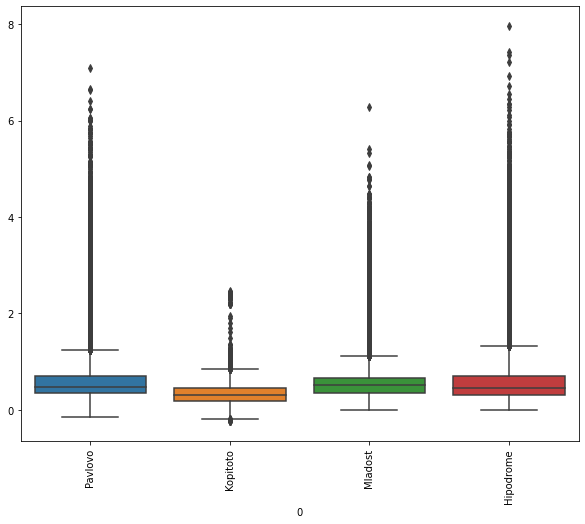

In [399]:
# Cleanup DONE
#TODO: Process data
#      Analyze data

co_measures = co_dataset[["Pavlovo", 'Kopitoto', 'Mladost', 'Hipodrome']]
fdp_measures = fdp_dataset[["Pavlovo", 'Kopitoto', 'Mladost', 'Hipodrome', 'Druzhba', 'Nadezhda']]

fig, ax=plt.subplots(figsize=(10,8))
bp = sns.boxplot(data = co_measures)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

[Text(0, 0, 'Pavlovo'),
 Text(1, 0, 'Kopitoto'),
 Text(2, 0, 'Mladost'),
 Text(3, 0, 'Hipodrome'),
 Text(4, 0, 'Druzhba'),
 Text(5, 0, 'Nadezhda')]

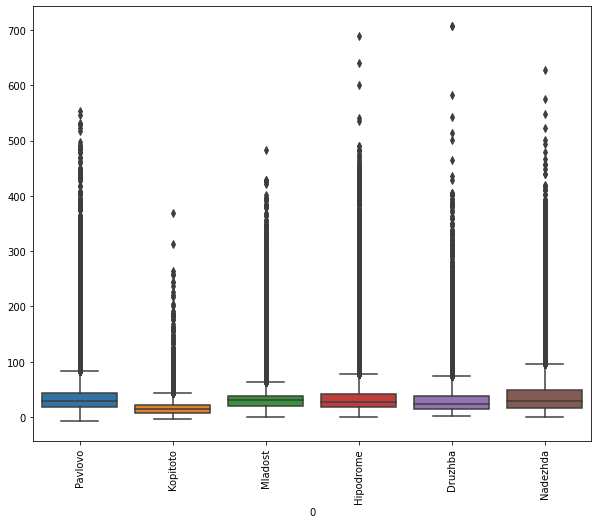

In [400]:
fig, ax=plt.subplots(figsize=(10,8))
bp = sns.boxplot(data = fdp_measures)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

In [401]:
scaled_co_measures = scaler.fit_transform(co_measures)
scaled_fdp_measures = scaler.fit_transform(fdp_measures)

scaled_co_data =pd.DataFrame(scaled_co_measures, columns = co_measures.columns)
scaled_fdp_data =pd.DataFrame(scaled_fdp_measures, columns = fdp_measures.columns)

scaled_co_data.head()

,Pavlovo,Kopitoto,Mladost,Hipodrome
0,0.727569,-0.578410,-0.163685,0.368238
1,1.755446,-0.479434,-0.163685,1.241833
2,1.772296,-0.627898,-0.163685,1.881430
3,2.193557,-0.578410,-0.163685,1.741031
4,1.047727,-0.429947,-0.163685,1.694231


In [402]:
scaled_fdp_data.head()

,Pavlovo,Kopitoto,Mladost,Hipodrome,Druzhba,Nadezhda
0,1.712591,-0.190866,0.069035,-0.166107,1.310458,1.208685
1,4.018960,-0.105507,0.069035,1.224238,3.648155,0.501434
2,4.009600,-0.180196,0.069035,1.317665,1.950234,-0.457025
3,3.368569,-0.255647,0.069035,1.121512,0.585283,-0.690224
4,1.158198,-0.239642,0.069035,0.685590,-0.001298,-0.619319


In [403]:
scaled_co_data.describe()

,Pavlovo,Kopitoto,Mladost,Hipodrome
count,4.382400e+04,4.382400e+04,4.382400e+04,43824.000000
mean,6.963668e-09,-5.570934e-09,1.392734e-08,0.000000
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011
min,-1.345034e+00,-2.805361e+00,-1.245135e+00,-0.988955
25%,-5.193627e-01,-6.773856e-01,-5.241683e-01,-0.520958
50%,-3.171575e-01,-1.330198e-01,-1.636852e-01,-0.286959
75%,8.725278e-02,6.092969e-01,1.331833e-01,0.118639
max,1.085468e+01,1.055634e+01,1.207154e+01,11.428580


In [404]:
scaled_fdp_data.describe()

,Pavlovo,Kopitoto,Mladost,Hipodrome,Druzhba,Nadezhda
count,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04
mean,2.089100e-09,-6.963668e-10,3.133650e-09,-2.089100e-09,2.785467e-09,-1.183824e-08
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-1.124892e+00,-1.526883e+00,-1.133089e+00,-8.603935e-01,-8.808824e-01,-9.349035e-01
25%,-5.193797e-01,-6.727238e-01,-5.020729e-01,-4.798199e-01,-5.297964e-01,-5.718800e-01
50%,-2.592231e-01,-1.801960e-01,-1.620416e-01,-2.721538e-01,-2.783429e-01,-2.852766e-01
75%,1.182919e-01,4.478010e-01,6.903487e-02,5.373593e-02,1.433340e-01,1.460073e-01
max,1.234685e+01,2.690827e+01,1.476609e+01,1.439842e+01,1.938664e+01,1.317771e+01


[Text(0, 0, 'Pavlovo'),
 Text(1, 0, 'Kopitoto'),
 Text(2, 0, 'Mladost'),
 Text(3, 0, 'Hipodrome')]

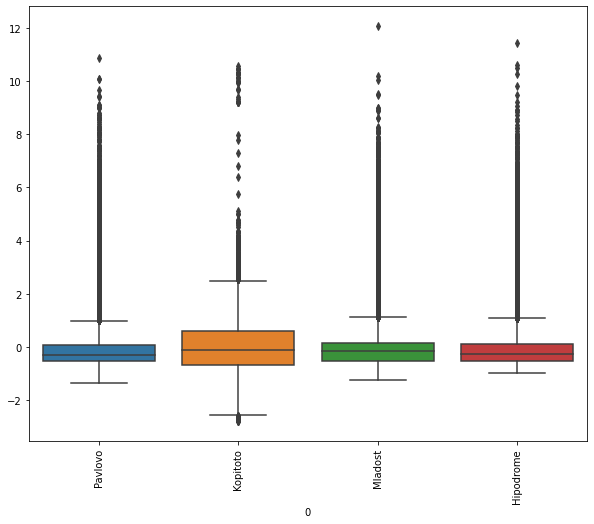

In [405]:
fig, ax=plt.subplots(figsize=(10,8))
bp = sns.boxplot(data = scaled_co_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

[Text(0, 0, 'Pavlovo'),
 Text(1, 0, 'Kopitoto'),
 Text(2, 0, 'Mladost'),
 Text(3, 0, 'Hipodrome'),
 Text(4, 0, 'Druzhba'),
 Text(5, 0, 'Nadezhda')]

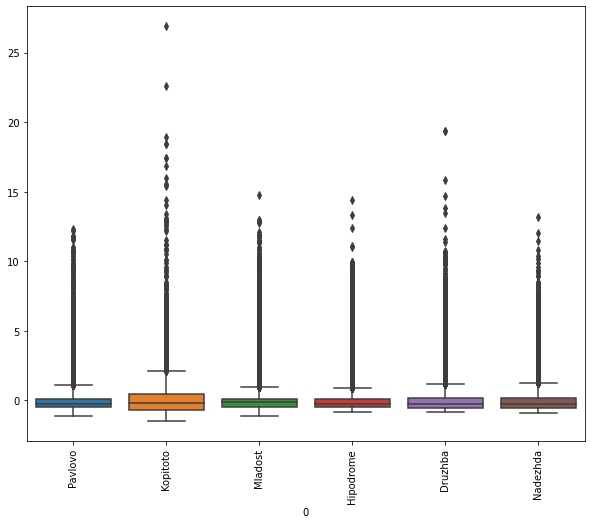

In [406]:
fig, ax=plt.subplots(figsize=(10,8))
bp = sns.boxplot(data = scaled_fdp_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

In [407]:
coQ1 = co_measures.quantile(0.25)
coQ3 = co_measures.quantile(0.75)
co_IQR = coQ3 - coQ1
print(co_IQR)

0
Pavlovo      0.36
Kopitoto     0.26
Mladost      0.31
Hipodrome    0.41
dtype: float64


In [408]:
fdpQ1 = fdp_measures.quantile(0.25)
fdpQ3 = fdp_measures.quantile(0.75)
fdp_IQR = fdpQ3 - fdpQ1
print(fdp_IQR)

0
Pavlovo      26.570002
Kopitoto     14.702500
Mladost      17.350000
Hipodrome    24.100000
Druzhba      23.409999
Nadezhda     31.892499
dtype: float64


In [409]:
co_outliers_removed_data = co_measures[~((co_measures<(coQ1-1.5*co_IQR))\
                                        | (co_measures>(coQ3+1.5*co_IQR))).any(axis=1)]
co_outliers_removed_data.shape

(37090, 4)

In [410]:
fdp_outliers_removed_data = fdp_measures[~((fdp_measures<(fdpQ1-1.5*fdp_IQR))\
                                        | (fdp_measures>(fdpQ3+1.5*fdp_IQR))).any(axis=1)]
fdp_outliers_removed_data.shape

(35336, 6)

[Text(0, 0, 'Pavlovo'),
 Text(1, 0, 'Kopitoto'),
 Text(2, 0, 'Mladost'),
 Text(3, 0, 'Hipodrome')]

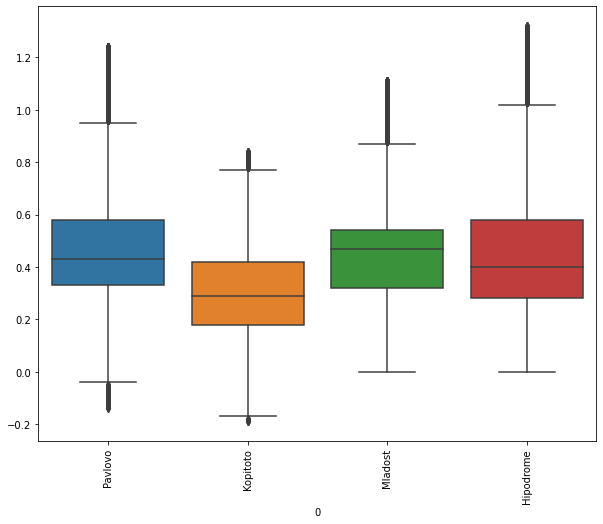

In [411]:
fig, ax=plt.subplots(figsize=(10,8))
bp = sns.boxplot(data = co_outliers_removed_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

[Text(0, 0, 'Pavlovo'),
 Text(1, 0, 'Kopitoto'),
 Text(2, 0, 'Mladost'),
 Text(3, 0, 'Hipodrome'),
 Text(4, 0, 'Druzhba'),
 Text(5, 0, 'Nadezhda')]

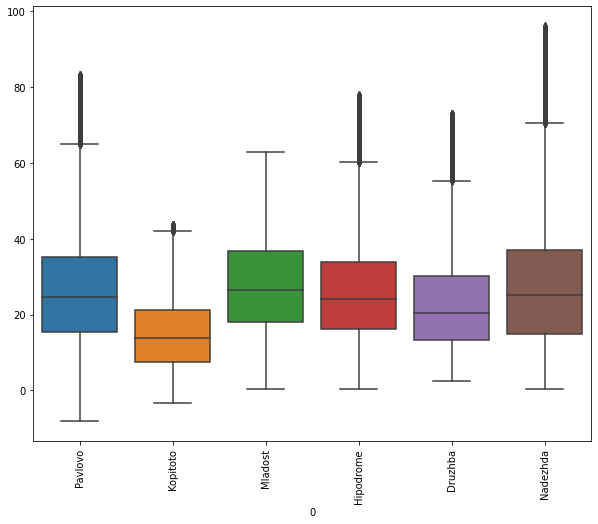

In [412]:
fig, ax=plt.subplots(figsize=(10,8))
bp = sns.boxplot(data = fdp_outliers_removed_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)